<a href="https://colab.research.google.com/github/quangdad/DataMining/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('patients.csv', header=None, names=['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology'])

data.head(10)



,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [103]:
with open('missing_rows.txt', 'a') as f:
    print("Các mẫu bị thiếu thông số:", file=f)
    for i, row in data.isin(['?']).any(axis=1).iteritems():
        if row == True:
            print(f"Mẫu {i+1}:", file=f)
            print(data.iloc[[i]], file=f)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           3000 non-null   int64  
 1   Age             3000 non-null   int64  
 2   Sex             3000 non-null   int64  
 3   Steroid         3000 non-null   int64  
 4   Antivirals      3000 non-null   int64  
 5   Fatigue         3000 non-null   int64  
 6   Malaise         3000 non-null   int64  
 7   Anorexia        3000 non-null   int64  
 8   LiverBig        3000 non-null   int64  
 9   LiverFirm       3000 non-null   int64  
 10  SpleenPalpable  3000 non-null   int64  
 11  Spiders         3000 non-null   int64  
 12  Ascites         3000 non-null   int64  
 13  Varices         3000 non-null   int64  
 14  Bilirubin       3000 non-null   float64
 15  AlkPhosphate    3000 non-null   int64  
 16  SGOT            3000 non-null   int64  
 17  Albumin         3000 non-null   f

<Axes: >

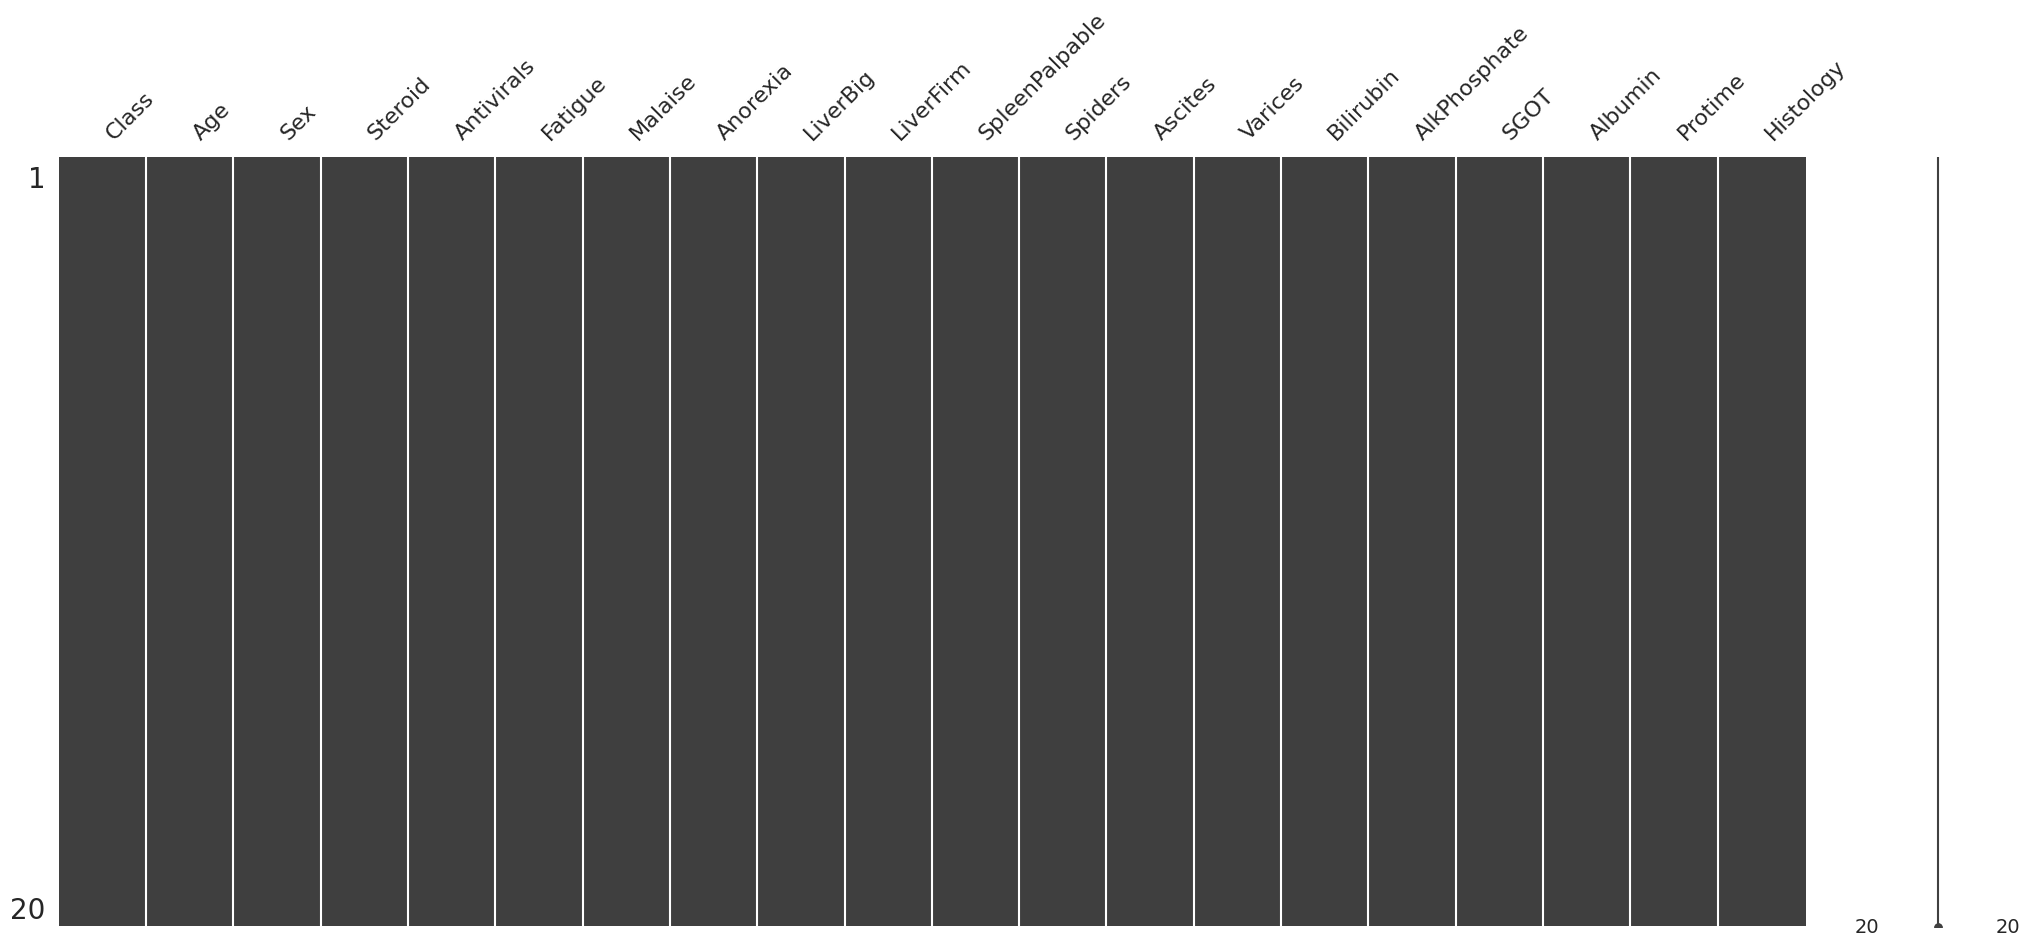

In [ ]:
msno.matrix(data.head(20))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 5 to 2999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           2925 non-null   int64 
 1   Age             2925 non-null   int64 
 2   Sex             2925 non-null   int64 
 3   Steroid         2925 non-null   object
 4   Antivirals      2925 non-null   int64 
 5   Fatigue         2925 non-null   object
 6   Malaise         2925 non-null   object
 7   Anorexia        2925 non-null   object
 8   LiverBig        2925 non-null   object
 9   LiverFirm       2925 non-null   object
 10  SpleenPalpable  2925 non-null   object
 11  Spiders         2925 non-null   object
 12  Ascites         2925 non-null   object
 13  Varices         2925 non-null   object
 14  Bilirubin       2925 non-null   object
 15  AlkPhosphate    2925 non-null   object
 16  SGOT            2925 non-null   object
 17  Albumin         2925 non-null   object
 18  Protime 

In [105]:
# Thêm thuộc tính mới 'LiverQuality' - Chất lượng gan
def liver_quality(row):
    if float(row['Bilirubin']) > 1.2 and float(row['Albumin']) < 3.5:
        return 0 # Kém
    else:
        return 1 # Tốt
data['LiverQuality'] = data.apply(liver_quality, axis=1)


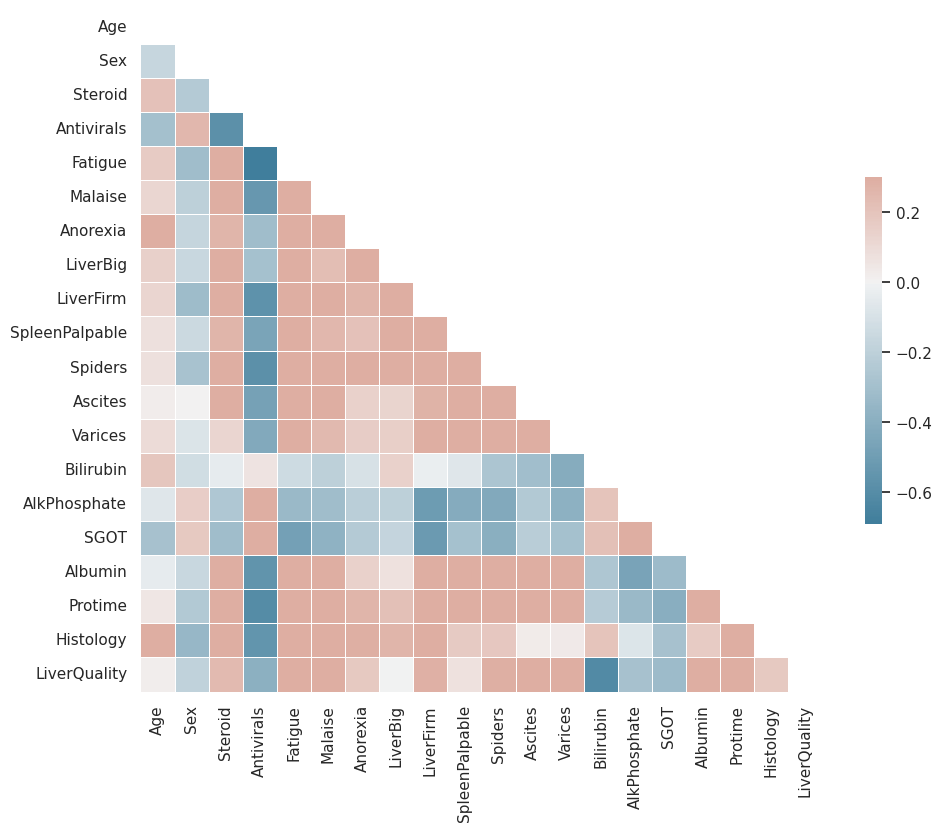

In [106]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Chuẩn hóa dữ liệu các thuộc tính số
numeric_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vẽ biểu đồ tương quan giữa các thuộc tính
sns.set(style="white")
corr = data.drop('Class', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [107]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(['Class', 'LiverQuality'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest và huấn luyện trên tập huấn luyện
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
# Dự đoán độ chính xác mô hình trên tập huấn luyện và tập kiểm tra

y_test_pred = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test set accuracy: {accuracy_test:.4f}')

Test set accuracy: 0.9932


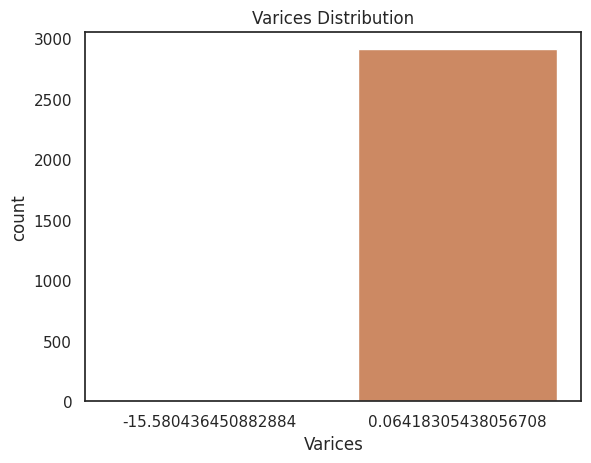

In [ ]:
sns.countplot(x='Varices', data=data)
plt.title('Varices Distribution')
plt.show()


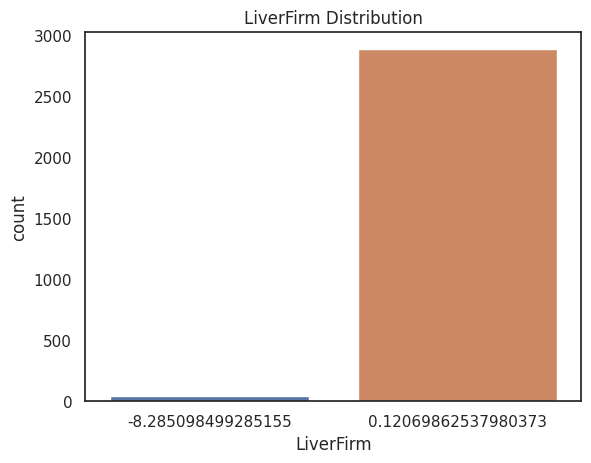

In [ ]:
sns.countplot(x='LiverFirm', data=data)
plt.title('LiverFirm Distribution')
plt.show()


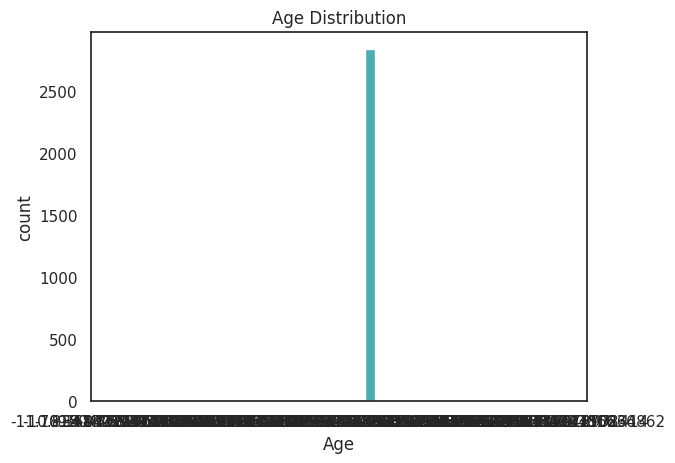

In [ ]:
sns.countplot(x='Age', data=data)
plt.title('Age Distribution')
plt.show()


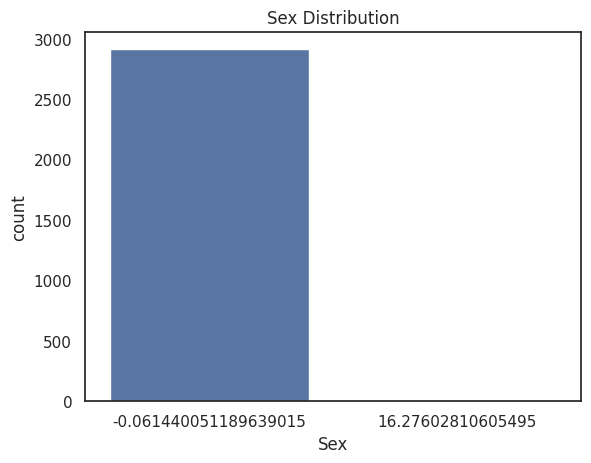

In [ ]:
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')
plt.show()

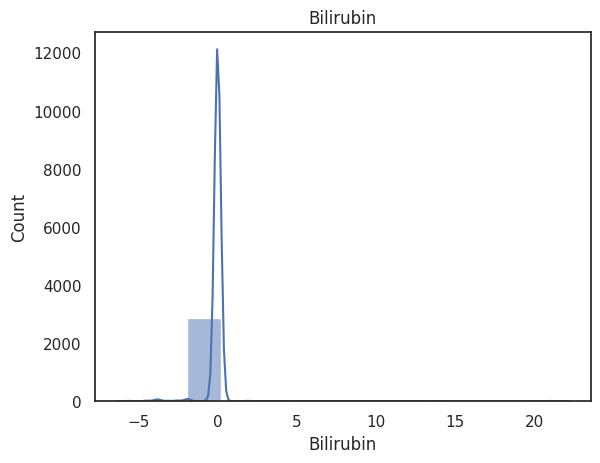

In [ ]:
sns.histplot(x='Bilirubin', data=data, kde=True)
plt.title('Bilirubin')
plt.show()

In [109]:
#In các mẫu dữ liệu và kết quả dự đoán tương ứng
print('Kết quả chuẩn đoán cho các bệnh nhân(Decisison tree):')
for i in range(len(data)):
  sample = data.iloc[[i]]
  prediction = sample['Class'].values[0]
  liver_quality = 'tốt' if sample['LiverQuality'].values[0] == 1 else 'kém'
  if prediction == 1:
    print(f'Mẫu {i+1}: Bệnh nhân không bị nhiễm virus viêm gan B, gan {liver_quality}')
  else:
    print(f'Mẫu {i+1}: Bệnh nhân bị nhiễm virus viêm gan B')

Kết quả chuẩn đoán cho các bệnh nhân(Decisison tree):
Mẫu 1: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 2: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 3: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 4: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 5: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 6: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 7: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 8: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 9: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 10: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 11: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 12: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 13: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 14: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 15: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 16: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 17: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 18: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 19: Bệnh nhân không bị nhiễm virus viêm gan B, gan tốt
Mẫu 20: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 21: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 22: Bệnh nhâ